# NFL Super Bowl Runner Up Post Season Evaluation
by Michael Pantoja

Last Updated: 2/15/2021

For this analysis, we will be taking a look at the subsequent season of the NFL Super Bowl Runner Up and compare it to the teams Super Bowl Season. In many competitions there is a concept known as "The Revenge Tour" in which it is believed that whenever a team or a player falls just short of winning a large event or competition, their subsequent season will be better for they will want to get "revenge" on the competition and prove they deserve to show their true abilities. For this notebook, we will be taking a look at the teams that fall just short in the NFL. That's to say, we will take a look at the teams that end up losing The Super Bowl and take a look to see how teams fare the following season. To do this we can take a look at the amount of wins the runner up receives and see how they compare the next season.

To begin, we will import the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

We will now import the first dataframe which consists of overall Super Bowl stats such as the winners, losers, how many points were scored, as well as the amount of wins the runner up achieved during the Super Bowl Season as well as the subsequent season

In [2]:
df = pd.read_csv('superBowlStats.txt', ',', usecols = ['Year', 'SB', 'Winner', 'WinnerPts', 'Loser','SBSeasonWins', 'NextSeasonWins'])

print(df.head())

   Year  SB                Winner  WinnerPts                 Loser  \
0  2020  54    Kansas City Chiefs         31   San Francisco 49ers   
1  2019  53  New England Patriots         13      Los Angeles Rams   
2  2018  52   Philadelphia Eagles         41  New England Patriots   
3  2017  51  New England Patriots         34       Atlanta Falcons   
4  2016  50        Denver Broncos         24     Carolina Panthers   

   SBSeasonWins  NextSeasonWins  
0            13               6  
1            13               9  
2            13              11  
3            11              10  
4            15               6  


This next secion is to create arrays for the total amoutn of wins the Runner Up is achieved during the post season as well as the next season. These will be used later.

In [3]:
NextSeasonWinsArray = df.loc[:,'NextSeasonWins']
NextSeasonWinsArray = NextSeasonWinsArray.values
SBSeasonWinsArray = df.loc[:,'SBSeasonWins']
SBSeasonWinsArray = SBSeasonWinsArray.values

Next we take advantage of the Matplitlib library to visualize how the amount of wins for the runner up changes between seasons. The first notable observation would be that the team that loses the Super Bowl also tends to do worse the next season. According to the graph, the last time a team performced better the season after they lost The Super Bowl was in 2013.

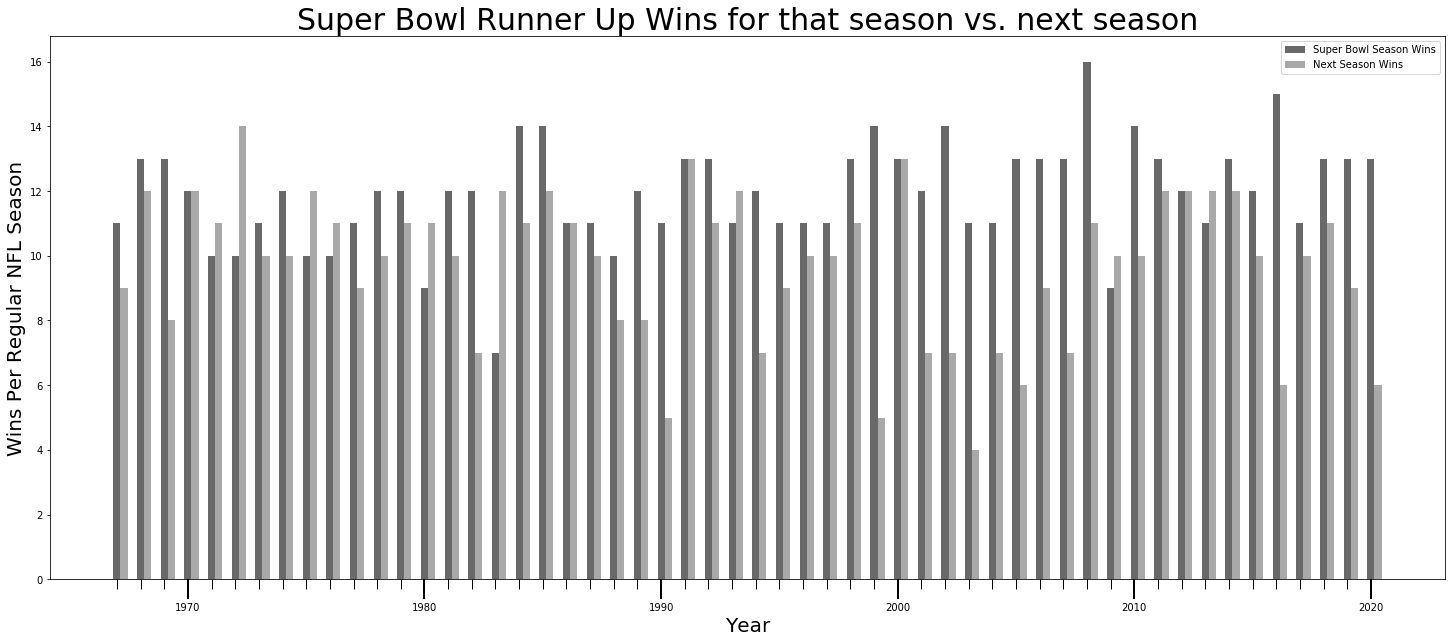

In [4]:
width = .3

fig, ax = plt.subplots(figsize = (25,10))
rects1 = ax.bar(df['Year'], df['SBSeasonWins'], width = width, label = 'Super Bowl Season Wins', color = 'dimgray')
rects2 = ax.bar(df['Year'] + width, df['NextSeasonWins'], width = width, label = 'Next Season Wins', color = 'darkgray')


ax.set_ylabel('Wins Per Regular NFL Season', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)
ax.set_xticks(df['Year'], minor = True)
ax.tick_params('x', length=20, width=2, which='major')
ax.tick_params('x', length=10, width=1, which='minor')
ax.set_title('Super Bowl Runner Up Wins for that season vs. next season', fontsize = 30)
ax.legend()

plt.show()

In this next graph, we can take a better look at the first graph and focus on the win differential between the runner up Super Bowl season compared to the subsequent season. We will notice that a majority of the seasons end up being worse than that of the Super Bowl season. This makes sense due to the fact that to be able to reach the Super Bowl requires a tremendous season and it may be difficult to recreate the same amount of success.

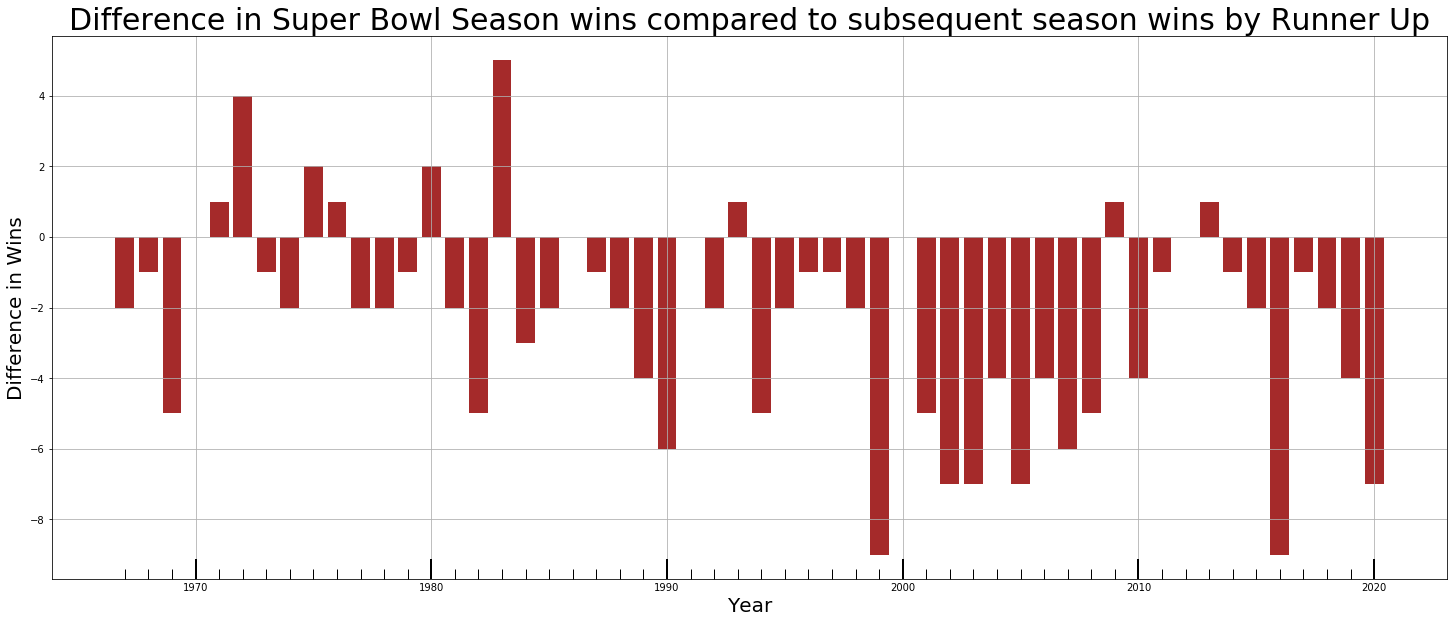

In [5]:
fig, ax = plt.subplots(figsize = (25,10))
rects1 = ax.bar(df['Year'], df['NextSeasonWins'] - df['SBSeasonWins'], color = 'brown')


ax.set_ylabel('Difference in Wins', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)
ax.set_xticks(df['Year'], minor = True)
ax.tick_params('x', length=20, width=2, direction = 'in', which='major')
ax.tick_params('x', length=10, width=1, direction = 'in', which='minor')
ax.set_title('Difference in Super Bowl Season wins compared to subsequent season wins by Runner Up', fontsize = 30)

plt.grid()
plt.show()

In [6]:
print('On average, the record differntial for the Super Bowl runners up the subsequent season is', + round(((df['NextSeasonWins'].sum() - df['SBSeasonWins'].sum()) / len(df['Loser'])), 2))
print('The Median Wins the subsequent season for the Super Bowl Runner Up is', + statistics.median(NextSeasonWinsArray))
print('The Median Difference in Super Bowl Season wins compared to subsequent season wins by Runner Up is', + statistics.median(NextSeasonWinsArray - SBSeasonWinsArray))

On average, the record differntial for the Super Bowl runners up the subsequent season is -2.24
The Median Wins the subsequent season for the Super Bowl Runner Up is 10.0
The Median Difference in Super Bowl Season wins compared to subsequent season wins by Runner Up is -2.0


We will now import a second database. This database will only focus on the Super Bowl Runner Up and see the stats they received at the end of the regular season, as well the as the total amount of wins they achieved for that season, as well as the next season.

In [7]:
df2 = pd.read_csv('runnerUpStats.txt', ',')

print(df2.columns)

Index(['RunnerUpName', 'PF', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD',
       'PassCmp', 'PassAtt', 'PassYds', 'PassTD', 'PassInt', 'PassNY/A',
       'Pass1stD', 'RushAtt', 'RushYds', 'RushTD', 'RushY/A', 'Rush1stD',
       'Pen', 'PenYds', 'Pen1stPy', 'SeasonWins', 'SubSeasonWins',
       'WonNextSB'],
      dtype='object')


In [8]:
SBSeasonWinsArray = df2.loc[:,'WonNextSB']
SBSeasonWinsArray = SBSeasonWinsArray.values

n = 0
for i in SBSeasonWinsArray:
    if i != 0:
        n += 1
print(f'Only {n} teams have won a Super Bowl the subsequent season out of {len(SBSeasonWinsArray)}')
print(f'The naive probability that the Super Bowl Runner Up wins the Super Bowl the subsequent season is {round(n/len(SBSeasonWinsArray) * 100, 2)}%')    

Only 3 teams have won a Super Bowl the subsequent season out of 54
The naive probability that the Super Bowl Runner Up wins the Super Bowl the subsequent season is 5.56%


Those three winners happen to be,

In [9]:
subsequentWinner = df2['WonNextSB'] == 1 
        
print(df2[['RunnerUpName']][subsequentWinner])

            RunnerUpName
2   New England Patriots
48        Miami Dolphins
49        Dallas Cowboys


From here we can begin to determine if there is any way to predict how the season will turn out for the current Super Bowl Runner Up which at this time, would be the Kansas City Chiefs. We would like to predict if the Kansas City Chiefs will win the Super Bowl and also what their regular season record will be.

# Machine Learning (KNN)

In [10]:
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

Due to the small sample size we have access to (n = 54), I decided to use KNN for my Machine Learning model as a way to predict if the runner up will win the Super Bowl as well as their record.

In [11]:
df2.drop(['RunnerUpName'], 1, inplace = True)
df3 = df2.copy()

In [12]:
df2.drop(['SubSeasonWins'], 1, inplace = True)
print(df2.columns)

Index(['PF', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'PassCmp', 'PassAtt',
       'PassYds', 'PassTD', 'PassInt', 'PassNY/A', 'Pass1stD', 'RushAtt',
       'RushYds', 'RushTD', 'RushY/A', 'Rush1stD', 'Pen', 'PenYds', 'Pen1stPy',
       'SeasonWins', 'WonNextSB'],
      dtype='object')


In [13]:
y = np.array(df2['WonNextSB'])
X = np.array(df2.drop(['WonNextSB'], 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

After running a simple KNN model, we realize that our model is able to predict if the runner up will win the Super Bowl with a score of >99%. This of course is biased due to undersampling.

In [14]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

1.0


It is at this point that we create a new data entry. This array is aactually the real stats of the Kansas City Chiefs at the end of the regular season, since that is the team we want to cast our predictions for the coming year.

In [15]:
ChiefsStats = np.array([473,6653,1057,6.3,16,9,397,420,630,4854,40,7,7.4,255,403,1799,13,4.5,110,105,919,32,14])
ChiefsStats = ChiefsStats.reshape(1, -1)

We run the new data point through the Super Bowl ML model and the model predicts that they will not win the Super Bowl given their stats. That is not a bold claim to make as we have seen that a naive probabiity stated that only around 5% of teams that lose the Super Bowl are able to win the following year. Let's try to take it a bit further.

In [16]:
print(clf.predict(ChiefsStats))

[0]


In [17]:
y2 = np.array(df3['SubSeasonWins'])
X2 = np.array(df3.drop(['SubSeasonWins', 'WonNextSB'], 1))

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.33)

We will now create a new model but this time redacting Subsequent Season Wins from the training set as we want to see if we can predict how many wins the Kansas City Chiefs will achieve in the following season.

In [19]:
clf2 = neighbors.KNeighborsClassifier()
clf2.fit(X_train2, y_train2)
print(clf2.score(X_test2, y_test2))

0.2222222222222222


Our new model is nowhere near as accurate as the first one, giving only a score of around 22%, but let's try to make a prediction anyways.

In [23]:
print(clf2.predict(ChiefsStats))

[12]


And as a result, this model predicts that the Kansas City Chiefs will win 12 games the following season.

# Conclusion, Going Deeper, and Acknowledgements

## Conclusion

Looking at the way the teams perform during the year that they reach the Super Bowl compared to the way they play the following year, we can confidently state that the idea of a "Revenge Tour" is not a thing in reality. Teams that lose in the Super Bowl game end up, on average, performing worse the following year - losing around two more games the following year than they did the year they went to the Super Bowl. In addition, we also discovered that there is no real correlation between how a team performs one year compared to the subsequent season, hence, why the model wasn't able to obtain a high score. 

## Going Deeper

There are more data points that I would like to elaborate as I feel like this is merely scratching the surface. There are a lot of data points and it is for that reason that people make livings off being sports analysts. As a result, I do plan on coming back to this notebook once I obtain further knowledge on better sampling and model optimizations. Some of the topics that I would like to cover in Version 2 of this notebook would include:

* Comparing the actual statistics of team performances of teams that lost in the Super Bowl compared to a team that wasn't involved with the Super Bowl the subsequent year
* Looking at different variables early in a season to be able to predict a Super Bowl winner that same year
* Analyzing winners, as opposed to losers.

## Acknowledgements

I want to say thank you to https://www.pro-football-reference.com/ for the statistics that I used to compile the databases that I created to use for this notebook.

I also want to say thank you for taking the time to view this notebook. There is a lot of work to be done but this is merely the beginning.